# **Assignment 5:**
# Machine Learning Fundamentals

___

## Linear Regression
This notebook analyzes the "wine-quality" dataset available at: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

First, we start with the importation of the required packages and libraries that we are going to need later.

In [1]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set()

Then, we proceed to read the wine datasets:

In [2]:
red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')
display(red_wine.head())
white_wine = pd.read_csv('winequality-white.csv', delimiter = ';')
display(white_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


We can explore both datasets to see which kind of data they have:

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


As can be seen, both datasets have the same number of columns (12). However, the white wine dataset has more entries (4989) than the red wine dataset (1599 entries). Additonally, there is no missing values in any dataset, and all the entries are numerical values.

**a) Combine the files into one, with red and white wine being a label**

In [5]:
red_wine.insert(0, 'wine_type','red')
white_wine.insert(0, 'wine_type','white')
wine_df = pd.concat([red_wine, white_wine])
display(wine_df)

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
#Another option would be create keys for every dataset during concatenation
#wine_df = pd.concat([red_wine, white_wine], keys=['red', 'white'])
#wine_df

Just for correlation matrix representation and be able to see the relationship of the type of wine with the rest of features, we should encode the 'wine_type' categorical values to numeric representation. Since there are just 2 different types of wine, we can use binary codification: 0- red wine, 1- white wine.

In [7]:
wine_df_temp = wine_df.copy()
cleanup_nums = {'wine_type': {'red': 0, 'white': 1}}
wine_df_temp.replace(cleanup_nums, inplace=True)
display(wine_df_temp.head())

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We can take a look at how the features are correlated with each other and with the class using a heatmap representation, to check multicollinearity.

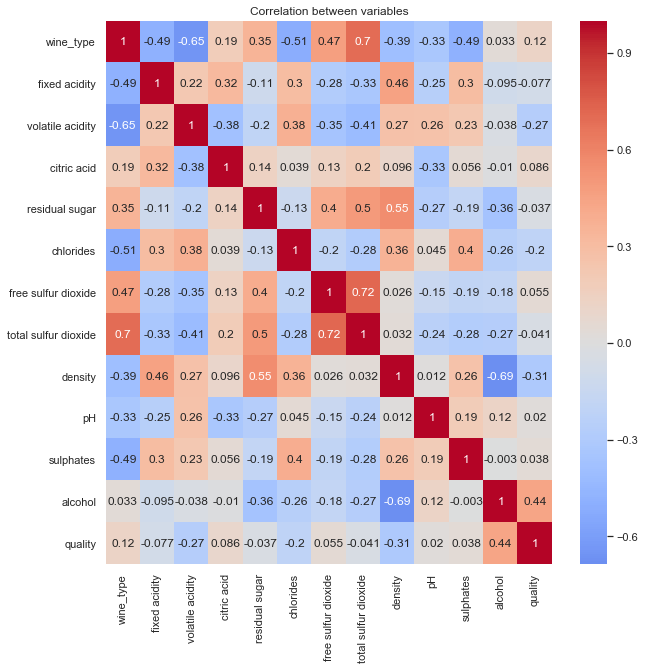

In [8]:
corr = wine_df_temp.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm', center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title('Correlation between variables');

This correlation matrix allows us to find features strongly correlated; e.g wine_type is strongly correlated (positive correlation) with total sulfur dioxide and with volatile acidity (negative correlation); also, total sulfur dioxide and free sulfur dioxide are correlated, or alcohol and density. Focusing just on the relation of each feature with the class, we can see that alcohol is the feature with the strongest positive correlation (0.44) with the target variable 'quality'. Whereas, density, volatile acidity, and chlorides have a weak negative correlation with wine quality. And the rest of the features: pH, residual sugar, sulphates, total sulfur dioxide, free sulfur dioxide, fixed acidity, and citric acid are not correlated with the quality class.

Additionally, we can also plot the entire dataset by pairs using pairplot() function to visualize how the different classes are distributed:

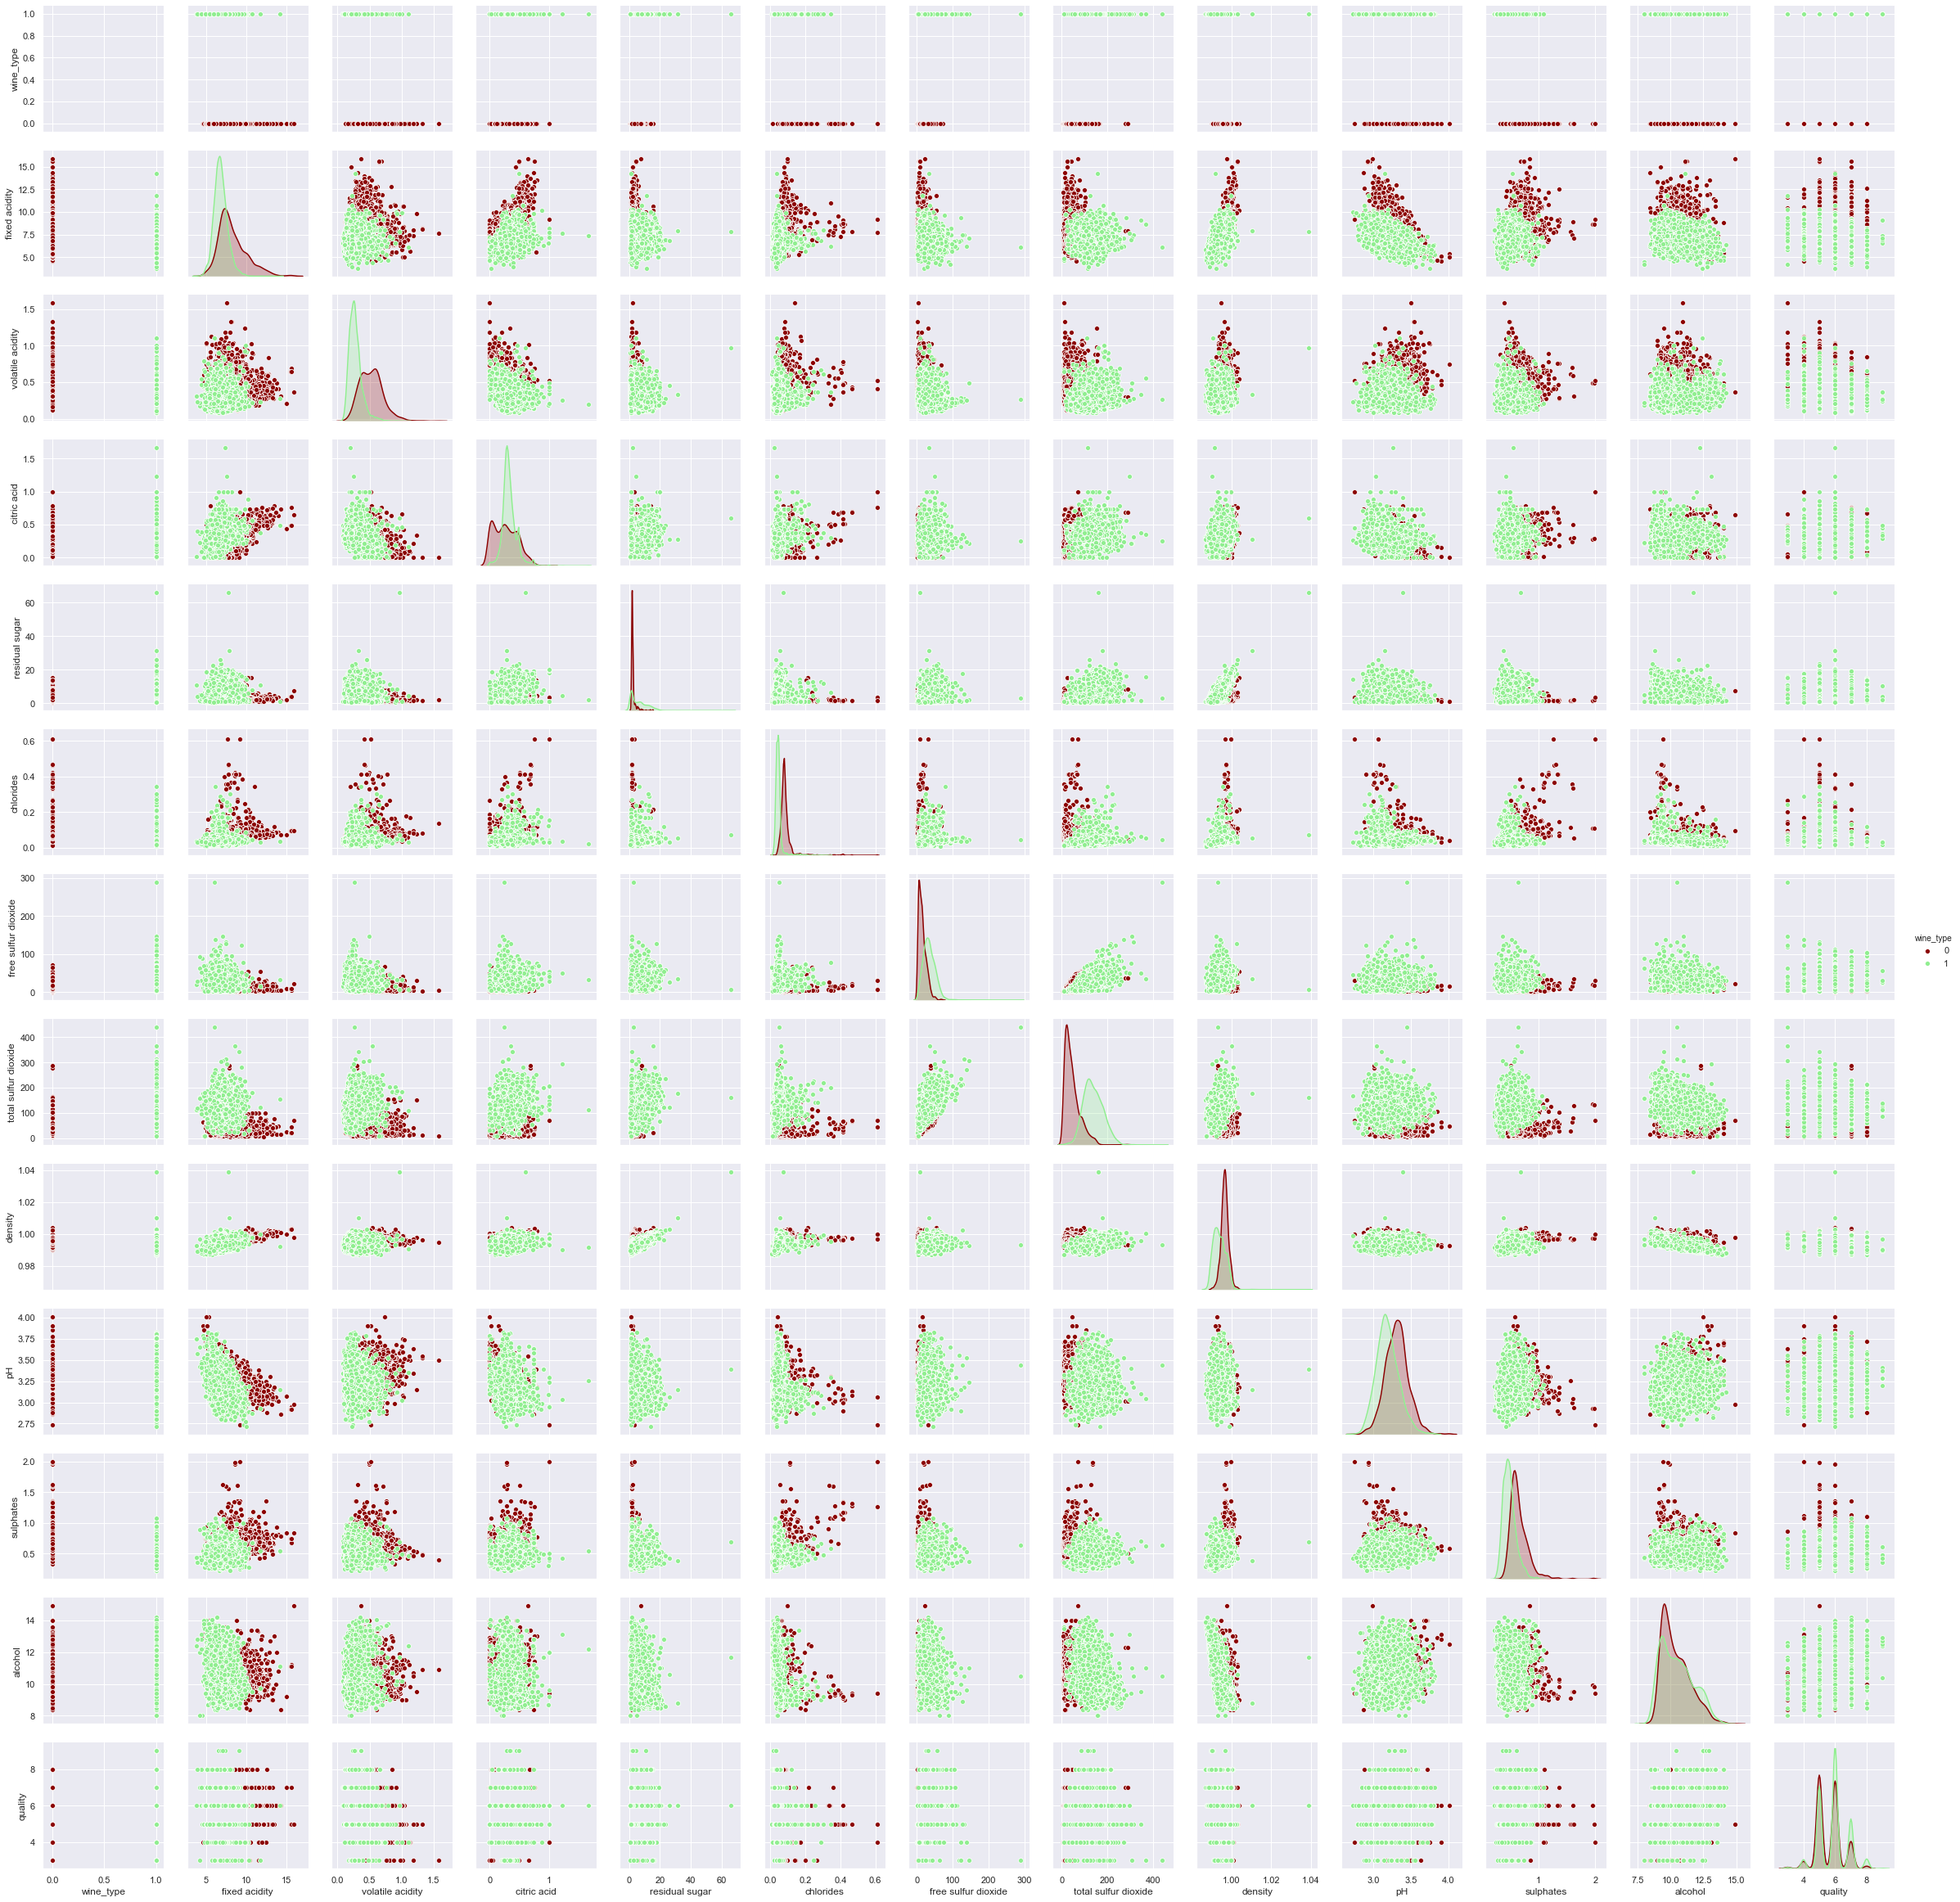

In [9]:
#feature column names
features = wine_df_temp.columns.values.tolist()
g = sns.pairplot(wine_df_temp, hue='wine_type', palette=['darkred', 'lightgreen'])

## Modeling

### Linear Regression for white wine data and quality:

For this analysis we can start extracting the white wine subset from the combined dataframe. Also, we can drop the categorical wine_type feture to continue with the data processing:

In [10]:
wine_df_white=wine_df[wine_df['wine_type']=='white'].drop(columns='wine_type')
wine_df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


 Then, we can plot the correlation between variables for the white wine subset

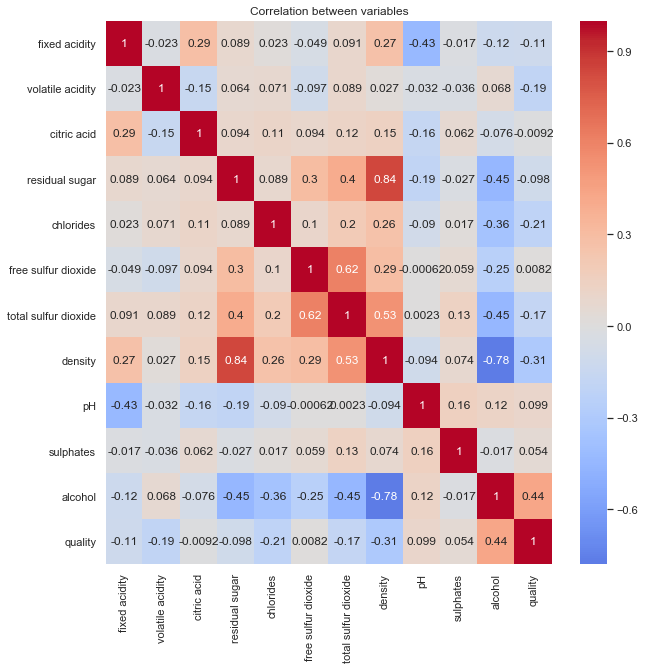

In [11]:
corr = wine_df_white.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm', center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title('Correlation between variables');

It can be seen that citric acid, free sulfur dioxide, and sulphates have a weak correlation with wine quality. We can also see how density has a strong positive correlation (0.84) with residual sugar, and a strong negative correlation (-0.78) with alcohol. This is not a good sign to train regression or linear models, and probably non-linear classification models will be more appropriate for this particular problem.

Now, we can split the dataframe just for white wine data ('wine_type'=1) into training and testing (80/20) using sklearn library:

In [12]:
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(wine_df_white.iloc[:,:-1], pd.DataFrame(wine_df_white['quality']), test_size=0.2, random_state=8000)
display(X_white_train.head())
display(y_white_train.head())
display(X_white_test.head())
display(y_white_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4422,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5
2472,8.8,0.24,0.23,10.3,0.032,12.0,97.0,0.99571,3.13,0.40,10.7
615,7.5,0.23,0.68,11.0,0.047,37.0,133.0,0.99780,2.99,0.38,8.8
140,6.3,0.31,0.34,2.2,0.045,20.0,77.0,0.99270,3.30,0.43,10.2
1735,8.0,0.32,0.36,4.6,0.042,56.0,178.0,0.99280,3.29,0.47,12.0


,quality
4422,6
2472,6
615,5
140,5
1735,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
42,7.0,0.31,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8
3069,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5
1765,6.9,0.29,0.23,8.6,0.056,56.0,215.0,0.99670,3.17,0.44,8.8
2804,6.4,0.22,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9
4158,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7


,quality
42,6
3069,8
1765,5
2804,8
4158,7


Then, we can train the linear regression model using the training dataset:

In [13]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_white_train, y_white_train);

We can interpret the results obtained by the linear regression model during training. Since the linear regresion model tries to fit a line to data, R^2 should be a good index to evaluate the fitting. However, class values are discrete, so it is expected that R^2 is low, that is why I'm including also the Root Mean Squared Error to measure of the differences between values predicted by the model and the real values. Also, it is worth mentioning that the predictions from the model should be rounded to the nearest integer (based on the original dataset, it makes not so much sense to classify wine quality using decimal values).

In [14]:
# R^2
print('R^2: %.2f' %linreg.score(X_white_train, y_white_train))

#calculate the predictions on the training set
y_white_pred_train = linreg.predict(X_white_train)
#round predictions
predicted_white_train = np.round_(y_white_pred_train)

# Root Mean Squared Error calculation
print('RMSE: %.2f' % mean_squared_error(y_white_train, predicted_white_train)**0.5)

# intercept and coefficients
print('Intercept =',linreg.intercept_)
print('Coefficients =',linreg.coef_)



R^2: 0.28
RMSE: 0.81
Intercept = [152.10301903]
Coefficients = [[ 6.74906412e-02 -1.83470663e+00  3.99161065e-02  8.49309511e-02
  -3.42731951e-01  3.01436140e-03 -2.52849800e-04 -1.52267956e+02
   7.03276920e-01  6.28761888e-01  1.92017526e-01]]


And finally, we can make predictions on the testing dataset to evaluate the linear model. Also, we can plot the real values versus the predicted values to visualize how well the model fits the data.

RMSE: 0.81


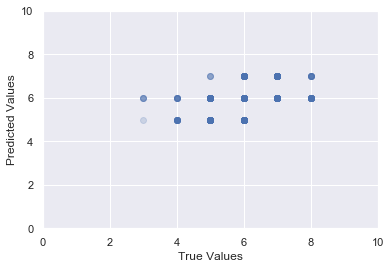

In [15]:
#make predictions on the testing set
y_white_pred = linreg.predict(X_white_test)
#round predictions
predicted_white_test = np.round_(y_white_pred)

# Root Mean Squared Error calculation
print('RMSE: %.2f' % mean_squared_error(y_white_test, predicted_white_test)**0.5)

#create a scatterplot of the real test values versus the predicted.
fig, ax = plt.subplots()
plt.ylim(0, 10)
plt.xlim(0, 10)
ax.scatter(y_white_test, predicted_white_test, alpha=0.2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
plt.show()

The model achieves a Root Mean Squared Error of 0.81 on both the training and the testing dataset. Additionally, we can plot the residuals for both the training and the testing data to visualize the performance of the model.

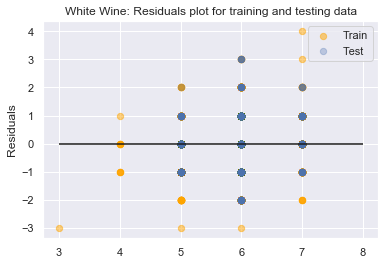

In [16]:
plt.scatter(predicted_white_train, predicted_white_train - y_white_train, c='orange', s=40, alpha=0.5, label='Train')
plt.scatter(predicted_white_test, predicted_white_test - y_white_test, c='b', s=40, alpha=0.3, label='Test')
plt.hlines(y=0, xmin=3, xmax=8)
plt.legend();
plt.title('White Wine: Residuals plot for training and testing data')
plt.ylabel('Residuals');

### Linear Regression for red wine data and quality:

For this analysis we can start extracting the red wine subset from the combined dataframe. Also, we can drop the categorical wine_type feture to continue with the data processing:

In [17]:
wine_df_red=wine_df[wine_df['wine_type']=='red'].drop(columns='wine_type')
wine_df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 Then, we can plot the correlation between variables for the red wine subset

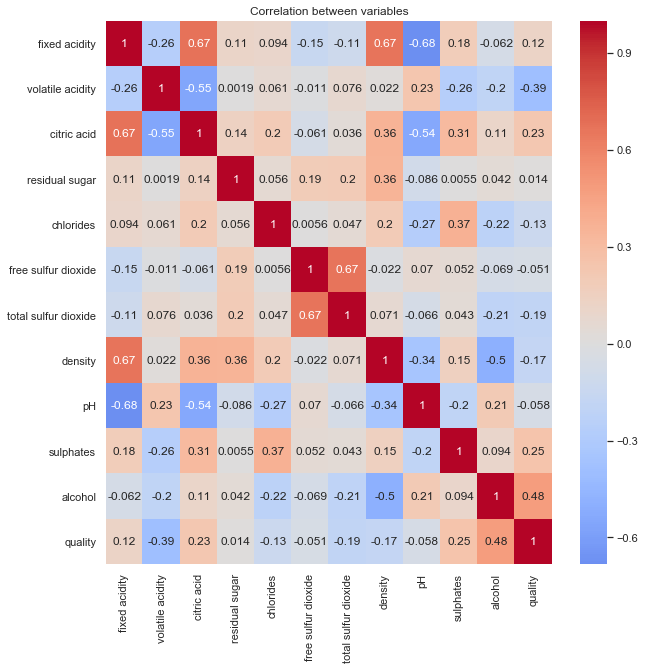

In [18]:
corr = wine_df_red.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm', center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title('Correlation between variables');

It can be seen that residual sugar and free sulfur dioxide have a weak correlation with wine quality. Also, we can see that any of the features has a strong correlation with the wine quality. Alcohol appears to have the strongest positive correlation with red wine quality(0.48), followed by volatile acidity (-0.39), and sulphates (0.25).

Now, we can split the dataframe just for red wine data into training and testing (80/20) using sklearn library:

In [19]:
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(wine_df_red.iloc[:,:-1], pd.DataFrame(wine_df_red['quality']), test_size=0.2, random_state=8000)
display(X_red_train.head())
display(y_red_train.head())
display(X_red_test.head())
display(y_red_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1248,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3
343,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
964,8.5,0.47,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.1
1296,6.6,0.63,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5


,quality
1248,6
263,5
343,6
964,6
1296,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
512,10.7,0.400,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7
817,10.8,0.290,0.42,1.6,0.084,19.0,27.0,0.99545,3.28,0.73,11.9
535,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3
1529,7.1,0.690,0.08,2.1,0.063,42.0,52.0,0.99608,3.42,0.60,10.2
916,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0


,quality
512,6
817,6
535,6
1529,6
916,5


Then, we can train the linear regression model using the training dataset:

In [20]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_red_train, y_red_train);

We can interpret the results obtained by the linear regression model during training:

In [21]:
# R^2
print('R^2: %.2f' %linreg.score(X_red_train, y_red_train))

#calculate the predictions on the training set
y_red_pred_train = linreg.predict(X_red_train)
#round predictions
predicted_red_train = np.round_(y_red_pred_train)

# Root Mean Squared Error calculation
print('RMSE: %.2f' % mean_squared_error(y_red_train, predicted_red_train)**0.5)

# intercept and coefficients
print('Intercept =',linreg.intercept_)
print('Coefficients =',linreg.coef_)

R^2: 0.35
RMSE: 0.71
Intercept = [40.77847536]
Coefficients = [[ 3.61803733e-02 -1.07712975e+00 -2.31858773e-01  3.04777435e-02
  -1.65640798e+00  3.31083501e-03 -3.40873747e-03 -3.66849293e+01
  -4.09785745e-01  9.07236172e-01  2.57652629e-01]]


And finally, we can make predictions on the testing dataset to evaluate the linear model. Also, we can plot the real values versus the predicted values to visualize how well the model fits the data.

RMSE: 0.00


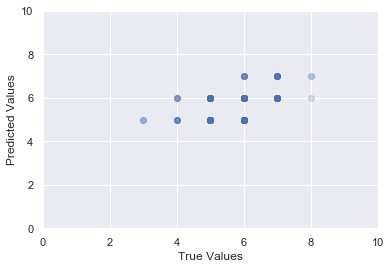

In [35]:
#make predictions on the testing set
y_red_pred = linreg.predict(X_red_test)
#round predictions
predicted_red_test = np.round_(y_red_pred)

# Root Mean Squared Error calculation
print('RMSE: %.2f' % mean_squared_error(y_red_test, y_red_test)**0.5)

#create a scatterplot of the real test values versus the predicted.
fig, ax = plt.subplots()
plt.ylim(0, 10)
plt.xlim(0, 10)
ax.scatter(y_red_test, predicted_red_test, alpha=0.2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
plt.show()

The model achieves a Root Mean Squared Error of 0.71 on the training dataset and 0.70 on the testing dataset. Additionally, we can plot the residuals for both the training and the testing data to visualize the performance of the model.

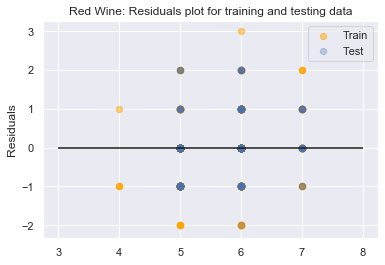

In [23]:
plt.scatter(predicted_red_train, predicted_red_train - y_red_train, c='orange', s=40, alpha=0.5, label='Train')
plt.scatter(predicted_red_test, predicted_red_test - y_red_test, c='b', s=40, alpha=0.3, label='Test')
plt.hlines(y=0, xmin=3, xmax=8)
plt.legend();
plt.title('Red Wine: Residuals plot for training and testing data')
plt.ylabel('Residuals');

### Linear Regression for the combined dataset and quality:

As commented before, any of the feature appears to have a really good correlation with the wine quality. In fact, alcohol is the feature with the strongest positive correlation with the target variable 'quality', but this correlation is just of 0.44. Thus, based on this dataset, it is not expected that a linear model is able to predict the quality of the wine.

We can start by splitting the dataframe into X and y subsets:

In [24]:
# Separate features X, all the columns except the last column and the wine_type column (categorical values)
X = wine_df.iloc[:,:-1].drop(columns='wine_type')
# View X to make sure the operations were successful
display(X)

# Separate the class/target y, 'quality' column of the dataframe
y = pd.DataFrame(wine_df['quality'])
#View y to make sure the operations were successful
display(y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


,quality
0,5
1,5
2,5
3,6
4,5
...,...
4893,6
4894,5
4895,6
4896,7


And then, split them into training and testing (80/20) using sklearn library:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8000)
display(X_train.head(5))
display(y_train.head(5))
display(X_test.head(5))
display(y_test.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3160,6.5,0.34,0.46,1.0,0.023,6.0,80.0,0.98865,3.15,0.54,12.9
2978,6.6,0.23,0.20,11.4,0.044,45.0,131.0,0.99604,2.96,0.51,9.7
932,6.5,0.26,0.28,12.5,0.046,80.0,225.0,0.99685,3.18,0.41,10.0
511,7.8,0.34,0.35,1.8,0.042,8.0,167.0,0.99080,3.11,0.41,12.1
2142,7.5,0.26,0.52,13.2,0.047,64.0,179.0,0.99820,3.10,0.46,9.0


,quality
3160,6
2978,6
932,6
511,6
2142,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2425,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1
3028,7.5,0.18,0.37,6.2,0.050,21.0,138.0,0.99546,3.20,0.55,10.5
708,7.7,0.20,0.44,13.9,0.050,44.0,130.0,0.99855,3.11,0.48,10.0
3972,6.8,0.37,0.67,1.5,0.175,16.0,98.0,0.99244,3.06,0.56,10.3
4362,6.2,0.24,0.27,2.9,0.039,30.0,123.0,0.98959,3.12,0.37,12.8


,quality
2425,6
3028,6
708,6
3972,6
4362,6


Then, we can train the linear regression model using the training dataset:

In [26]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train);

Now, we can make predictions on the testing dataset to evaluate the linear model, and plot the real values versus the predicted values to visualize how well the model fits the data.

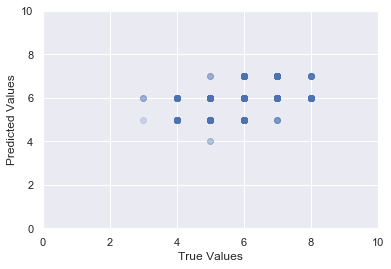

In [28]:
#make predictions on the testing set
y_pred = linreg.predict(X_test)

#round predictions
predicted_test = np.round_(y_pred)

#create a scatterplot of the real test values versus the predicted.
fig, ax = plt.subplots()
plt.ylim(0, 10)
plt.xlim(0, 10)
ax.scatter(y_test, predicted_test, alpha=0.2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
plt.show()

We can interpret the results obtained by the linear regression model.

In [33]:
# R^2
print('R^2: %.2f' %linreg.score(X_train, y_train))

#calculate the predictions on the training set
y_pred_train = linreg.predict(X_train)
#round predictions
predicted_train = np.round_(y_pred_train)

# Root Mean Squared Error calculation and other statistical measurements
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

# intercept and coefficients
print('Intercept =',linreg.intercept_)
coefficients = pd.DataFrame(linreg.coef_.reshape(-1,1),X.columns.values.tolist())
coefficients.columns = ['Coefficient'] 
display(coefficients)

R^2: 0.29
Mean Absolute Error: 0.5007692307692307
Mean Squared Error: 0.6146153846153846
Root Mean Squared Error: 0.7839740969033253
Intercept = [55.96241478]


,Coefficient
fixed acidity,0.067755
volatile acidity,-1.329840
citric acid,-0.144850
residual sugar,0.044251
chlorides,-0.448889
free sulfur dioxide,0.006183
total sulfur dioxide,-0.002570
density,-55.112180
pH,0.426240
sulphates,0.835109


The model achieves a final Root Mean Squared Error of 0.78 on the testing dataset. Additionally, we can plot the residuals for both the training and the testing data to visualize the performance of the model.

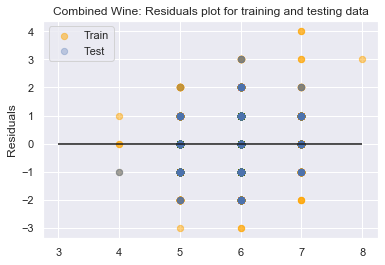

In [30]:
plt.scatter(predicted_train, predicted_train - y_train, c='orange', s=40, alpha=0.5, label='Train')
plt.scatter(predicted_test, predicted_test - y_test, c='b', s=40, alpha=0.3, label='Test')
plt.hlines(y=0, xmin=3, xmax=8)
plt.legend();
plt.title('Combined Wine: Residuals plot for training and testing data')
plt.ylabel('Residuals');

## Conclusions

Based on these results, we can conclude that using this dataset it’s not possible to find a linear model that accurately identifies the quality level of red and white wines. This can be mainly due to the fact that quality values for wines are discrete values, and the predicted values obtained using linear regression are continuous, not probabilistic. Also, linear models are sensitive to imbalance data for classification, and this particular dataset is highly unbalanced.

___

## Logistic Regression
This notebook analyzes the "Haberman's Survival" dataset available at: https://archive.ics.uci.edu/ml/datasets/Haberman's%2BSurvival 

First, we start with the importation of the required packages and libraries that we are going to need later.

In [190]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

sns.set()

Then, we proceed to read the Haberman's survival dataset. From the haberman.names file we can extract the following attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [191]:
# load the dataset
haberman_df = pd.read_csv('haberman.data', names=['age', 'year_of_operation', 'positive_axillary_nodes', 'survival_status'])
display(haberman_df.head())

,age,year_of_operation,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


We can explore the dataset to see the kind of data it has:

In [192]:
haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                        306 non-null int64
year_of_operation          306 non-null int64
positive_axillary_nodes    306 non-null int64
survival_status            306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


There are no missing values in the dataset, and all the entries are numerical values.

We can take a look at how the features are correlated with each other and with the class using a heatmap representation, to check multicollinearity.

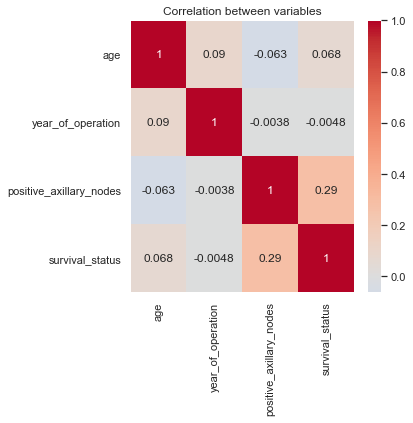

In [193]:
corr = haberman_df.corr()
fig, ax = plt.subplots(figsize = (5,5))
g= sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm', center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title('Correlation between variables');

As an be seen, there is no strong correlation between variables. The feature 'positive axillary nodes' is the feature with the strongest positive correlation with the survival status, but this correlation is weak (0.29).

Now, we can plot the dataset by pairs using pairplot() function to visualize how the different classes are distributed:

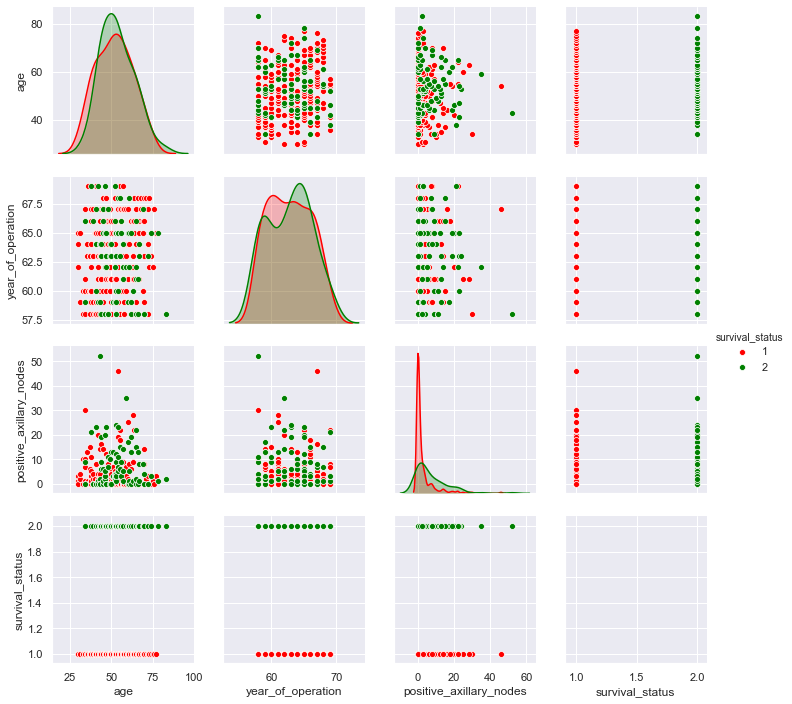

In [128]:
#feature column names
features = haberman_df.columns.values.tolist()
g = sns.pairplot(haberman_df, hue='survival_status', palette=['red', 'green'])

To contonue with the data analysis and have a more meaningful class, we can convert the 'survival_status' column to categorical values by mapping the value 1 to 'yes' (the patient survived 5 years or longer), and 2 to 'no' (the patient died within 5 years).

In [194]:
# modify the target column values to be meaningful as well as categorical
haberman_df['survival_status'] = haberman_df['survival_status'].map({1:'yes', 2:'no'})
haberman_df['survival_status'] = haberman_df['survival_status'].astype('category')
print(haberman_df.head())

   age  year_of_operation  positive_axillary_nodes survival_status
0   30                 64                        1             yes
1   30                 62                        3             yes
2   30                 65                        0             yes
3   31                 59                        2             yes
4   31                 65                        4             yes


## Modeling

### Logistic Regression:

Now, we can split the dataframe into training and testing (80/20) using sklearn library:

In [195]:
X_train, X_test, y_train, y_test = train_test_split(haberman_df.iloc[:,:-1], pd.DataFrame(haberman_df['survival_status']), test_size=0.2, random_state=8000)
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,age,year_of_operation,positive_axillary_nodes
63,43,59,2
1,30,62,3
7,34,59,0
215,59,62,35
4,31,65,4


,survival_status
63,no
1,yes
7,no
215,no
4,yes


,age,year_of_operation,positive_axillary_nodes
126,50,59,0
13,34,60,0
199,57,64,1
42,40,65,0
150,52,60,5


,survival_status
126,yes
13,yes
199,no
42,yes
150,yes


Then, we can train the logistic regression model using the training dataset:

In [196]:
# instantiate model
logreg = LogisticRegression()

# fit the model to the training data (learn the coefficients)
logreg.fit(X_train, y_train);

And then, we can predict the survival status for the test data using the regression model:

In [197]:
y_pred = logreg.predict(X_test)

Finally, we can evaluate the performance of our logistic regression model using the accuracy score, the conf:

Logistic Regression on Haberman's survival dataset 

                            precision    recall  f1-score   support

survived more than 5 years       0.50      0.12      0.20        16
       died within 5 years       0.76      0.96      0.85        46

                  accuracy                           0.74        62
                 macro avg       0.63      0.54      0.52        62
              weighted avg       0.69      0.74      0.68        62



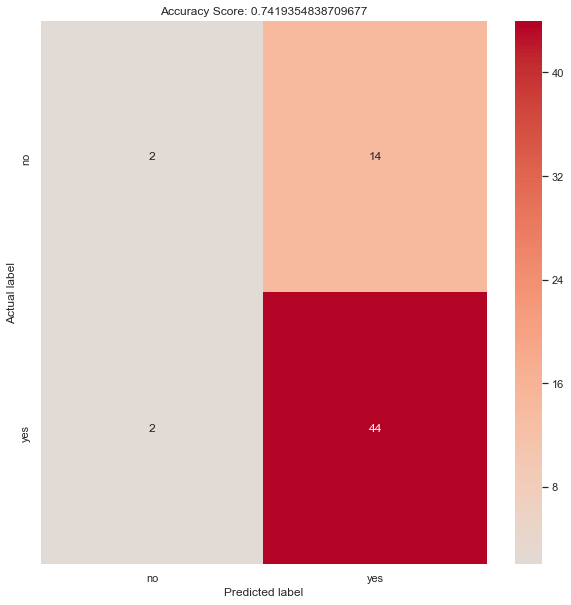

In [232]:
print ("Logistic Regression on Haberman's survival dataset \n")
print (classification_report(y_test, y_pred, target_names=['survived more than 5 years','died within 5 years']))

score = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(cm,ax=ax, annot= True, cmap='coolwarm', center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
labels = ['no', 'yes']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Accuracy Score: {0}'.format(score));
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [239]:
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
      dtype=object)

## Conclusions

The logistic model has an accuracy of 74.19%. However, as can be seen on the confusion matrix, the model tends to overclassify 'yes' survival cases. It could be due to the fact that the dataset is higly unbalanced (81 'no' class values, and 225 'yes' class values).

In [240]:
haberman_df.survival_status.value_counts()

yes    225
no      81
Name: survival_status, dtype: int64